In [5]:
%matplotlib notebook 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import scipy.stats as sts
import random

In [6]:
pwd

'C:\\Users\\meera\\OneDrive\\Documents\\Data Analytics\\Projects\\1'

In [9]:
#read healthcare csv file, print out the columns
health_data = "voice_assistant_consumer_adoption_in_healthcare_report_data.csv"
health_df = pd.read_csv(health_data, encoding="utf-8")
health_df

,device_car based assistant,device_smart watch,device_computer,device_smart appliance,device_fitness device,device_smart earpieces,device_uncommon smart device,device_smart speaker,device_smartphone,device_smart tv,...,use_provide care,use_healthcare device,use_health insurance,use_health or wellness coaching,use_other,Usage Based on Income,Gender Usage,Age Usage,Privacy Sentiment_Jan,Privacy Sentiment_Sept
0,no,no,no,no,no,no,no,no,no,no,...,no,no,no,no,no,NaN,NaN,NaN,mildly concerned,moderately concerned
1,no,no,no,no,no,no,no,no,no,no,...,no,no,no,no,no,NaN,NaN,NaN,not concerned,not concerned
2,no,no,no,no,no,no,no,no,yes,no,...,no,no,no,no,no,NaN,NaN,NaN,moderately concerned,mildly concerned
3,no,no,no,no,no,no,no,no,yes,no,...,no,no,no,no,no,NaN,NaN,NaN,moderately concerned,mildly concerned
4,yes,yes,yes,no,yes,no,yes,yes,yes,yes,...,yes,yes,yes,yes,no,< $50K,female,18 - 29,very concerned,very concerned
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999,yes,yes,yes,no,yes,no,no,yes,yes,no,...,yes,yes,yes,no,no,< $50K,female,18 - 29,very concerned,very concerned
1000,no,no,no,no,no,no,no,no,no,no,...,no,no,no,no,no,NaN,NaN,NaN,don't know,not concerned
1001,no,no,no,no,no,no,no,no,yes,no,...,no,no,no,no,no,NaN,NaN,NaN,mildly concerned,mildly concerned
1002,no,no,no,no,no,no,no,no,no,no,...,no,no,no,no,no,NaN,NaN,NaN,mildly concerned,moderately concerned


In [23]:
#read consumer_report csv file, print out columns
consumer_data = "smart_speaker_consumer_adoption_report_2019.csv"
consumer_df = pd.read_csv(consumer_data, encoding="utf-8")
consumer_df.columns

Index(['brand_2019', 'device', 'smart_display_2018', 'usage_2019',
       'usage_2018', 'number_devices_2019', 'number_devices_2018',
       'living_room', 'bedroom', 'kitchen', 'home_office', 'dining_room',
       'bathroom', 'garage', 'work_office', 'music', 'news', 'movies',
       'how_to_instructions', 'history', 'products', 'restaurants', 'sports',
       'retail_store_hours', 'science', 'math', 'games', 'health_and_wellness',
       'none_of_the_above', 'celebrities', 'politics', 'local_business',
       'travel', 'other', 'professional_work_related',
       'finance_banking_investing', 'fashion'],
      dtype='object')

In [ ]:
#isolate the usage labels 
consumer_use_df = consumer_df[['music', 'news', 'movies',
       'how_to_instructions', 'history', 'products', 'restaurants', 'sports',
       'retail_store_hours', 'science', 'math', 'games', 'health_and_wellness',
       'celebrities', 'politics', 'local_business',
       'travel', 'professional_work_related',
       'finance_banking_investing', 'fashion', 'other']]
consumer_use_df.head()

In [ ]:
#find number of yes and no in each column via value_counts()
consumer_usage_counts_df = consumer_use_df.apply(pd.Series.value_counts)
consumer_usage_counts_df

In [ ]:
#define labels
consumer_labels = ['Music', 'News', 'Movies',
       'How to Instructions', 'History', 'Products', 'Restaurants', 'Sports',
       'Retail Store Hours', 'Science', 'Math', 'Games', 'Health and Wellness',
       'Celebrities', 'Politics', 'Local Business',
       'Travel', 'Professional Work Related',
       'Finance Banking Investing', 'Fashion', 'Other']
#define values 
count = consumer_usage_counts_df.iloc[1, :]
#define explosion of the wedges- to distinguish the wedges
explode = (0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 
            0.10, 0.15, 0.17, 0.19, 0.21, 0.23, 0.25, 0.27, 0.29, 0.31)
#plot the pie
fig2, ax = plt.subplots()
plt.pie(count, labels = consumer_labels, autopct='%1.1f%%', explode=explode)


#draw circle in middle of pie to make a donut
center_circle = plt.Circle((0,0), 0.5, color = 'white', fc = 'white', linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(center_circle)

plt.axis("equal")
plt.title('Usage of Voice Assistants', pad=20.0, loc='left')
plt.show()

In [ ]:
#read healthcare csv file, print out the columns
health_data = "voice_assistant_consumer_adoption_in_healthcare_report_data.csv"
health_df = pd.read_csv(health_data, encoding="utf-8")
health_df.columns

In [ ]:
#isolate the device types from the health dataframe
device_types_df = health_df[['device_car based assistant', 'device_smart watch', 'device_computer',
       'device_smart appliance', 'device_fitness device',
       'device_smart earpieces', 'device_uncommon smart device',
       'device_smart speaker', 'device_smartphone', 'device_smart tv']]
device_types_df.head()

In [ ]:
#count how many yes and no values there are
device_counts_df = device_types_df.apply(pd.Series.value_counts)
device_counts_df

In [ ]:
#define labels
labels = ['Car-based Assistant', 'Smart Watch', 'Computer',
       'Smart Appliance', 'Fitness Device',
       'Smart Earpieces', 'Uncommon Smart Device',
       'Smart Speaker', 'Smartphone', 'Smart TV']
#define values
count = device_counts_df.iloc[1, :]
#explode wedges of pie
explode = (0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02)

#plot the pie
fig2, ax = plt.subplots()
plt.pie(count, labels = labels, autopct='%1.1f%%', explode=explode)

#draw circle in middle of pie to make a donut
center_circle = plt.Circle((0,0), 0.5, color = 'white', fc = 'white', linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(center_circle)

plt.axis("equal")
plt.title('Healthcare Devices Using Voice Assistants', pad=20.0, loc='left', fontweight='bold')
plt.show()

In [ ]:
#isolate the auto uses of from health dataframe
auto_df = health_df[['auto_embedded', 'auto_bluetooth',
       'auto_CarPlay', 'auto_android auto', 'auto_other']]
auto_df.head()

In [ ]:
#count number of yes and no in the auto dataframe
auto_count_df = auto_df.apply(pd.Series.value_counts)
auto_count_df

In [ ]:
#define labels
auto_labels = ['Embedded', 'Bluetooth', 'CarPlay', 'Android Auto', 'Other']
#define values
count = auto_count_df.iloc[1, :]
#explode the wedges of the pie
explode = (0.01, 0.02, 0.03, 0.04, 0.05)

#plot the pie
fig, ax = plt.subplots()
plt.pie(count, labels = auto_labels, autopct='%1.1f%%', explode=explode)


#draw circle in middle of pie to make a donut
center_circle = plt.Circle((0,0), 0.5, color = 'white', fc = 'white', linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(center_circle)

plt.axis("equal")
plt.title('Auto Usage of Voice Assistants', pad= 15, loc = 'left', fontweight='bold')
plt.show()

In [ ]:
uses_df = health_df[['use_illness symptons', 'use_medication information',
       'use_locate services', 'use_treatment options', 'use_nutrition info',
       'use_locate healthcare professional', 'use_shop for medication',
       'use_schedule appointments', 'use_provide care',
       'use_healthcare device', 'use_health insurance',
       'use_health or wellness coaching', 'use_other ']]
uses_df.head(n=3)

In [ ]:
use_counts_df = uses_df.apply(pd.Series.value_counts)
use_counts_df

In [ ]:
fig, ax = plt.subplots()

health_labels = ['Illness Symptons', 'Medication Information',
       'Locate Services', 'Treatment Options', 'Nutrition Info',
       'Locate Healthcare Professional', 'Shop for Medication',
       'Schedule Appointments', 'Provide Care',
       'Healthcare Device', 'Health Insurance',
       'Health or Wellness Coaching', 'Other']
yes = use_counts_df.iloc[1, :]

y_values = np.arange(len(health_labels)) 

#define colors
colors=['teal',
       'gold',
       'aqua',
       'darksalmon',
       'darkseagreen',
       'peachpuff',
       'springgreen',
       'lightslategray',
       'cadetblue',
       'deeppink',
       'mediumorchid',
       'midnightblue',
       'plum']
#my_cmap = cm.get_cmap()
#my_norm = Normalize(vmin= 0, vmax = 8)

plt.barh(y_values, yes, align='center', color=colors)
plt.yticks(y_values)
ax.set_yticklabels(health_labels, fontsize=5)
ax.invert_yaxis()

plt.xlabel('Count')
plt.ylabel('Uses')
plt.title('Uses of Voice Assistants in Healthcare')


plt.show()

In [ ]:
#define wedge labels
health_labels = ['Illness Symptons', 'Medication Information',
       'Locate Services', 'Treatment Options', 'Nutrition Info',
       'Locate Healthcare Professional', 'Shop for Medication',
       'Schedule Appointments', 'Provide Care',
       'Healthcare Device', 'Health Insurance',
       'Health or Wellness Coaching', 'Other']

#define wedge values
count = use_counts_df.iloc[1, :]

#explode wedges
explode = (0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.15, 0.20, 0.25)

#plot pie
fig1, ax1 = plt.subplots()
plt.pie(count, labels = health_labels, autopct='%1.1f%%', explode=explode)


#draw circle in middle of pie to make a donut
center_circle = plt.Circle((0,0), 0.5, color = 'white', fc = 'white', linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(center_circle)

plt.title('Voice Assistant Usage in Healthcare', pad=20, fontweight='bold')
plt.axis("equal")
plt.show()

In [10]:
#read age data from csv file
age_data = "voice_assistants_interest_by_age.csv"
age_df = pd.read_csv(age_data, encoding="utf-8")
age_df.head()

,18 - 29,30 - 45,45 - 60,61+
0,interested,interested,interested,interested
1,not interested,not interested,not interested,not interested
2,interested,interested,interested,interested
3,interested,interested,interested,interested
4,interested,interested,interested,interested


In [11]:
#count unique values for each column
age_df.apply(pd.Series.value_counts)

,18 - 29,30 - 45,45 - 60,61+
have used,91.0,NaN,NaN,NaN
have used,NaN,80.0,70.0,60.0
interested,530.0,508.0,547.0,462.0
not interested,383.0,416.0,387.0,NaN
not interested,NaN,NaN,NaN,482.0


In [12]:
#use combine_first function to merge first two rows to remove NaN values; 
#separate into 2 dataframes, one with each incorrect row

df1 = pd.DataFrame({"18 - 29 ": [91.0, 530.0, 383.0, None],
                   "30 - 45": [None,  508.0, 416.0, None],
                   "45 - 60": [None, 547.0, 387.0, None],
                   "61+": [None, 462.0, None, 482.0]})
df2 = pd.DataFrame({"18 - 29 ": [None, 530.0, 383.0, None],
                   "30 - 45": [80.0,  508.0, 416.0, None],
                   "45 - 60": [70.0, 547.0, 387.0, None],
                   "61+": [60.0, 462.0, None, 482.0]})
df1.combine_first(df2)


,18 - 29,30 - 45,45 - 60,61+
0,91.0,80.0,70.0,60.0
1,530.0,508.0,547.0,462.0
2,383.0,416.0,387.0,NaN
3,NaN,NaN,NaN,482.0


In [13]:
#use combine_first function to merge last two rows to remove NaN values
df1 = pd.DataFrame({"18 - 29 ": [91.0, 530.0, 383.0],
                   "30 - 45": [80.0,  508.0, 416.0],
                   "45 - 60": [70.0, 547.0, 387.0],
                   "61+": [60.0, 462.0, None]}, index = ['have used', 'interested', 'not interested'])
df2 = pd.DataFrame({"18 - 29 ": [91.0, 530.0, None],
                   "30 - 45": [80.0,  508.0, None],
                   "45 - 60": [70.0, 547.0, None],
                   "61+": [60.0, 462.0, 482.0]}, index = ['have used', 'interested', 'not interested'])
counts_df = df1.combine_first(df2)
counts_df

,18 - 29,30 - 45,45 - 60,61+
have used,91.0,80.0,70.0,60.0
interested,530.0,508.0,547.0,462.0
not interested,383.0,416.0,387.0,482.0


<IPython.core.display.Javascript object>


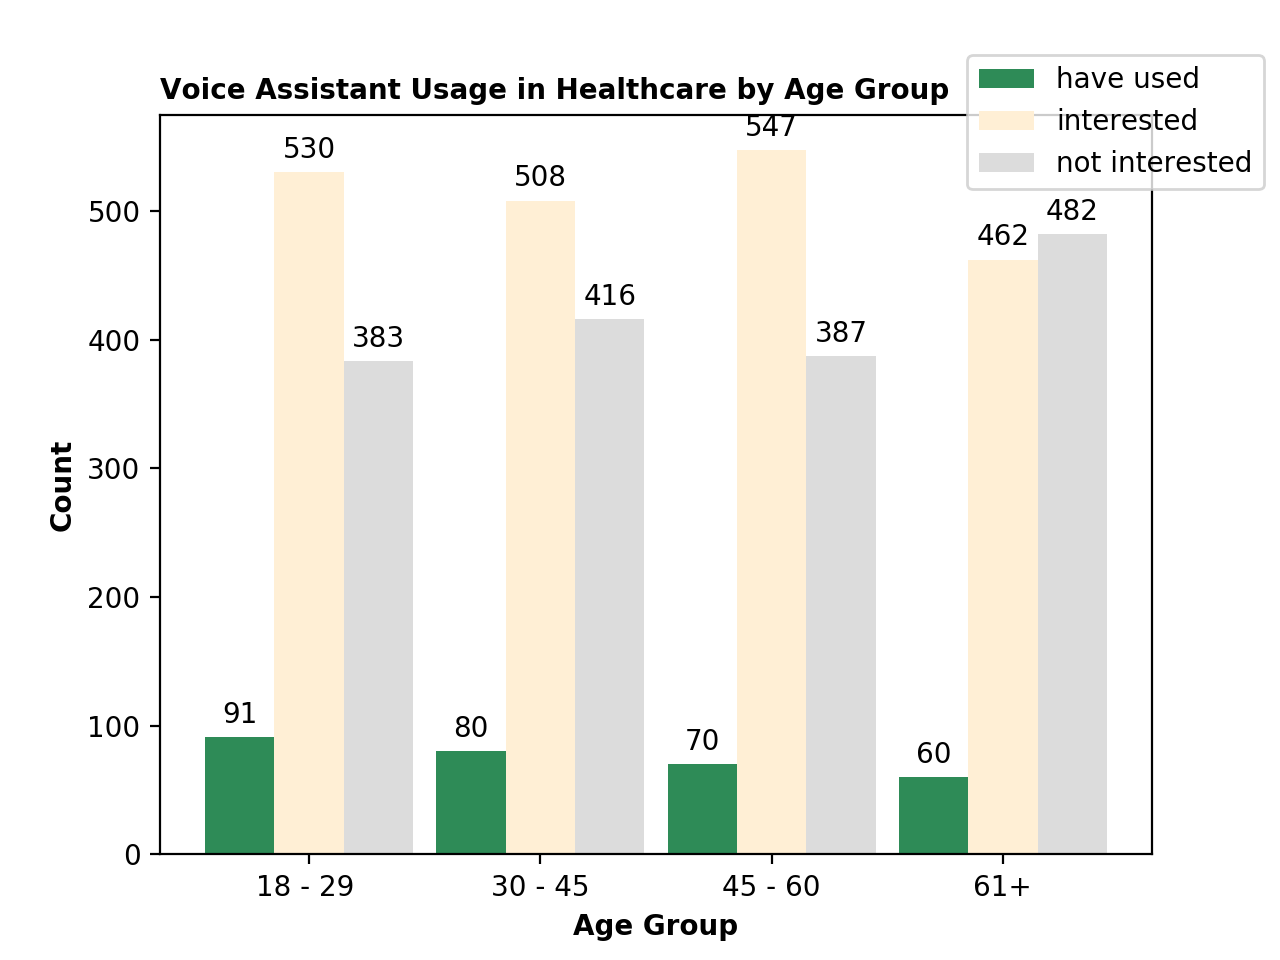

In [22]:
#set the x-axis labels as the columns  of age_df
x_values = counts_df.columns

#width of the bars 
bar_width = 0.3

#define values for each of the three bars
bars1 = counts_df.iloc[0, :]
bars2 = counts_df.iloc[1, :]
bars3 = counts_df.iloc[2, :]

#define positions for each bar

#position of the bar
pos1 = np.arange(len(bars1)) 
pos2 = [x + bar_width for x in pos1]
pos3 = [x + bar_width for x in pos2]

#plot the grouped bar chart
#fig [object<fig>]
fig, ax=plt.subplots()
first_bar = plt.bar(pos1, bars1, 
        width=bar_width, 
        color="seagreen", 
        label="have used")

second_bar = plt.bar(pos2, bars2, 
        width= bar_width, 
        color= "papayawhip", 
        label="interested")

third_bar = plt.bar(pos3, bars3, 
        width=bar_width, 
        color="gainsboro", 
        label="not interested")

#attach text label above each bar
#pos <Array[fig]>
def autolabel(bar_fig):
    for num in bar_fig:
        height = num.get_height().astype('int')
        ax.annotate('{}'.format(height),
                   xy=(num.get_x() + num.get_width()/2, height),
                   xytext = (0, 3),
                   textcoords = 'offset points',
                   ha = 'center', va = 'bottom')

autolabel(first_bar)
autolabel(second_bar)
autolabel(third_bar)

#define labels
plt.xlabel('Age Group', fontweight='bold')

#define xticks, pos2 for where label is placed
plt.xticks(pos2, labels= x_values)

#define ylabel
plt.ylabel('Count', fontweight='bold')

#define title
plt.title('Voice Assistant Usage in Healthcare by Age Group', 
          loc = 'left', 
          fontsize=10, 
          fontweight='bold')

#format legend
plt.legend(loc = 'upper left', 
           bbox_to_anchor=(0.8, 1.1))
plt.show()

<IPython.core.display.Javascript object>


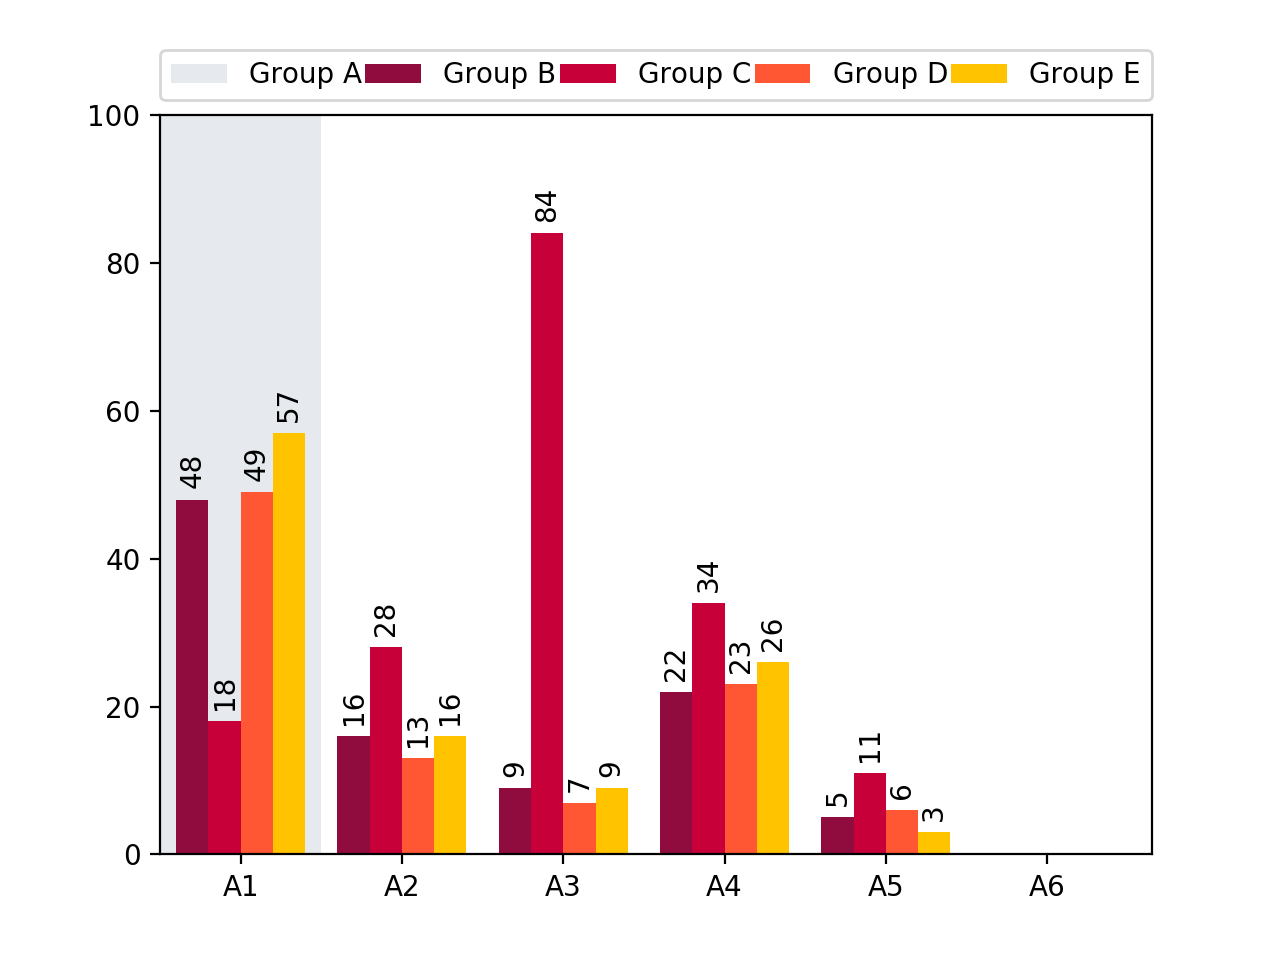

In [16]:
raw_data = {'plan_type': ['A1', 'A2', 'A3', 'A4', 'A5', 'A6'],
        'Group A':     [100, 0, 0, 0, 0, 0],
        'Group B':     [48, 16, 9, 22, 5, 0],
        'Group C':     [18, 28, 84, 34, 11, 0],
        'Group D': [49, 13, 7, 23, 6, 0],
        'Group E':          [57, 16, 9, 26, 3, 0]

    }
df2 =pd.DataFrame(raw_data, columns = ['plan_type', 'Group A'])
df = pd.DataFrame(raw_data, 
                  columns = ['plan_type', 'Group B', 'Group C', 'Group D', 'Group E'])

ax = df2.plot.bar(rot=0,color='#E6E9ED',width=1)
ax = df.plot.bar(rot=0, ax=ax, color=["#900C3F", '#C70039', '#FF5733', '#FFC300'], 
                 width = 0.8 )

for p in ax.patches[1:]:
    h = p.get_height()
    x = p.get_x()+p.get_width()/2.
    if h != 0:
        ax.annotate("%g" % p.get_height(), xy=(x,h), xytext=(0,4), rotation=90, 
                   textcoords="offset points", ha="center", va="bottom")

ax.set_xlim(-0.5, None)
ax.margins(y=0)
ax.legend(ncol=len(df.columns), loc="lower left", bbox_to_anchor=(0,1.02,1,0.08), 
          borderaxespad=0, mode="expand")
ax.set_xticklabels(df["plan_type"])
plt.show()

In [ ]:
pos1

In [ ]:
#define the values of the bars 
bars1 = counts_df.iloc[0, :]
bars2 = counts_df.iloc[1, :]
bars3 = counts_df.iloc[2, :]

#define bars as bars1 + bars2 to pass 'bars' as the bottom argument for bars3 
bars = np.add(bars1, bars2).tolist()

#define positions of bars on the x-axis
x = [0, 1, 2, 3]

#define names of the x-labels
names = ["18-29", "30-45", "45-60", "61+"]

#define width of the bar
new_width = 0.5

#plot bars on graph
f, ax1 = plt.subplots(figsize = (7, 5))
plt.bar(x, bars1, 
        color="teal", 
        width=new_width)

plt.bar(x, bars2, 
        color="seashell", 
        bottom=bars1, 
        width=new_width)

plt.bar(x, bars3, 
        color="lavender", 
        bottom=bars, 
        width=new_width)

#define x-tick labels
plt.xticks(x, labels = names)

#define title and axis labels
plt.xlabel('Age Groups')
plt.ylabel('Count')
plt.title('Voice Assistant Usage in Healthcare by Age Group', loc='left')

#define legend
plt.legend(labels=["have used", "interested", "not interested"], bbox_to_anchor=(0.84, 0.9))
plt.show()